In [44]:
#http://kaylynnx.github.io/posts/Perceptron/

**Quick walk through of my algorithm:

First, as given to us, I start with making my blobs. I initially start with n = 100. But when I was doing my experimentation, I would change n as I changed the number of features. I wanted to have 50 samples for each feature. I also would remove the centers when I increased the number of features.

Then I created my Perceptron class. In the indicator function I created, I returned 1 if X > 0, otherwise 0. Then I created the fit function. First, I set the weights to random numbers and I set the training score to 0. Within the for loop, I did a few calculations. I started by calculating the prediction error by doing the dot product between X and w (which are the weights plus b). I think compare y and y_pred. Based on that, I update all components of w tilde (w and b). I also update the score and the history of the scores.

That brings me to how I calculated the score. I score is the average of getting it right (1) vs. getting it wrong (0). I couldn’t do the score function without a prediction function. The prediction function is just the dot product of X and w. I also have the function w, which just returns the weights, and the function, history, which just turns the history of scores.

Finally, I plot everything.

**Experimentation:

The first set of experimentation that I did was changing the learning rates. Included in my fit function within my Perceptron class, I set the learning rates between 0.001 and 1. I noticed that when I changed my learning rate to 0.001, the perceptron algorithm learned slowly, much slower. However, when I set the perceptron algorithm to 1, the algorithm learned extremely fast, and I couldn’t see the progression of the accuracy. So, the sweet spot was setting the learning rate to 0.1.

I also increeased the number of features I had to 10. When I did this, I noticed that the accuracy rate toggled in the 30’s (30% or so). This suggests that as I add features, my perceptron learns less accurately. Furthermore, when I increase the number of interations to 2,000 and maintained the number of features at 10, the accurac rate jumped to the 60’s (60% or so). Despite have a larger number of iterations, having a linearly separable graph gets more difficult. With 2 features, 1000 iterations, and a linearly separable graph, I noticed that my algorithm will always converge and produce an accuracy of 1. However, with 2 features, 1000 iterations, and a non-linearly separable graph, my algorithm never converges. The accuracy rate, at one point will stay stagnant.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3
#n = (p_features - 1) * 50

X, y = make_blobs(n_samples = n, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])
# X, y = make_blobs(n_samples = n, n_features = p_features - 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
class Perceptron:
    def __init__(self):
        self.weights = None
        self.training_score = None
        self.training_history = []
    
    def indicator(self, X):
        return np.where(X > 0, 1, -1)
    
    def fit(self, X, y, num_iterations=1000, learning_rate=0.01):
        self.weights = np.random.randn(X.shape[1] + 1)  # initialize weights randomly
        print(f'Initial Weights: {self.weights}')

        self.training_score = 0.0  # initialize score
        for i in range(num_iterations):
            y_pred = self.indicator(np.dot(X, self.weights[:-1]) + self.weights[-1])  # predict on all samples
            # update weights based on prediction error
            misclassified = y * y_pred <= 0
            self.weights[:-1] += learning_rate * np.dot(X.T, y * misclassified)
            self.weights[-1] += learning_rate * np.sum(y * misclassified)
            # calculate score and update history
            self.training_score = np.mean(y == y_pred)
            self.training_history.append(self.training_score)

    
    def predict(self, X):
        # add bias term to input
        X = np.c_[X, np.ones(X.shape[0])]
        return self.indicator(np.dot(X, self.weights))
    
    def w(self):
        return self.weights
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y == y_pred)
    
    def history(self):
        return self.training_history

Initial Weights: [ 1.67834508 -0.76553614  0.04903625]
Weights: [1.47322257 0.1682865  0.73903625]
Last 10 Training History: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Score: 0.5


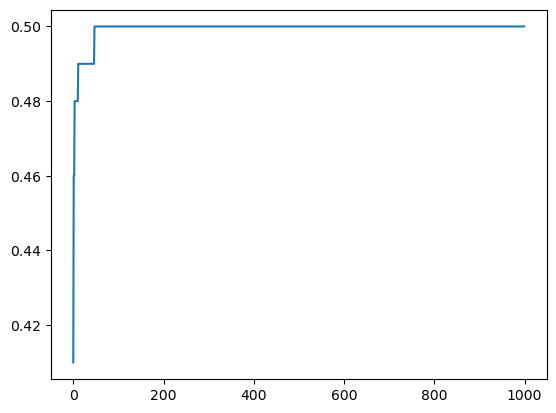

In [20]:
p = Perceptron()
p.fit(X,y, num_iterations = 1000)

print(f'Weights: {p.w()}')
print(f'Last 10 Training History: {p.history()[-10:]}')
print(f'Score: {p.score(X,y)}')

plt.plot(p.history())

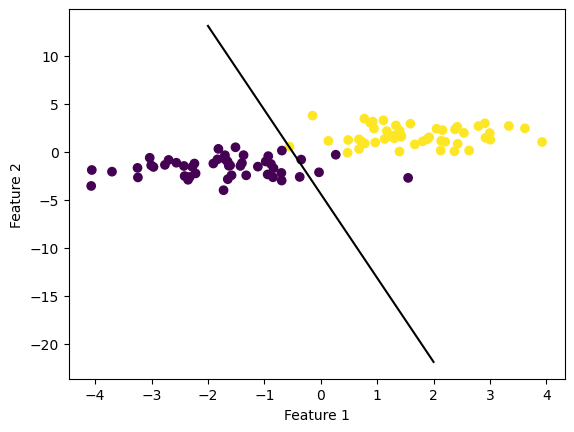

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w(), -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Testing my perceptron algorithm on linearly seperable data, we can see that my perceptron algorithm is able to correctly separate the two sets of points, as seen below:

Initial Weights: [-0.36918184 -0.23937918  1.0996596 ]


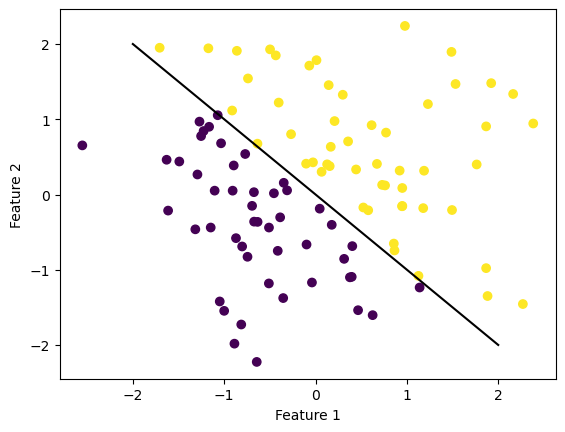

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate linearly separable data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:,0] + X[:,1] > 0, 1, -1)

# Fit the perceptron algorithm to the data
p = Perceptron()
p.fit(X, y)

# Plot the decision boundary
fig = plt.scatter(X[:,0], X[:,1], c=y)
fig = draw_line(p.w(), -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

plt.show()

**Runtime:

I believe that the runtime of one iteration of perceptron depends on the number of features but not on the number of data points. When we do the perceptron algorithm, there is one main dot product and then we update the weights. Going through this math, I believe that the runtime would be O(p). There would be n multiplications and n additions. And because it is only one iteration, the number of n does not matter.